<a href="https://colab.research.google.com/github/habibanalytics/University_Final_Year_Project/blob/master/Notebooks/Data_Analysis_Chicago_Dataset_First_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Avoid colab clossing**
Copy this to the 
```
function ClickConnect(){
    document.querySelector("colab-connect-button").click()
    console.log("Clicked on connect button"); 
}
setInterval(ClickConnect,60000)
```

## **Imports**

In [ ]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt

## **Importing dataset**

In [ ]:
url_2019_present="https://data.cityofchicago.org/api/views/x2n5-8w5q/rows.csv?accessType=DOWNLOAD"
url_2001_present="https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"
df= pd.read_csv(url_2019_present, encoding = "utf-8")
df.head(3)

#df= pd.read_csv(url, encoding = "utf-8", nrows=1000) #taking less rows so i can easily preprocess

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JE163990,11/23/2020 03:05:00 PM,073XX S SOUTH SHORE DR,0820,THEFT,$500 AND UNDER,APARTMENT,N,N,334,7.0,06,NaN,NaN,NaN,NaN,NaN
1,JE266628,06/15/2021 09:30:00 AM,080XX S DREXEL AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,631,8.0,06,1183633.0,1851786.0,41.748486,-87.602675,"(41.748486365, -87.602675062)"
2,JE266536,06/15/2021 07:50:00 AM,042XX W MADISON ST,0560,ASSAULT,SIMPLE,SIDEWALK,N,N,1115,28.0,08A,1148227.0,1899678.0,41.880661,-87.731186,"(41.880660786, -87.731186405)"


## **Basic information**

In [ ]:
df.info()
print("Rows and Columns size: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203250 entries, 0 to 203249
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   203250 non-null  object 
 1   DATE  OF OCCURRENCE     203250 non-null  object 
 2   BLOCK                   203250 non-null  object 
 3    IUCR                   203250 non-null  object 
 4    PRIMARY DESCRIPTION    203250 non-null  object 
 5    SECONDARY DESCRIPTION  203250 non-null  object 
 6    LOCATION DESCRIPTION   202518 non-null  object 
 7   ARREST                  203250 non-null  object 
 8   DOMESTIC                203250 non-null  object 
 9   BEAT                    203250 non-null  int64  
 10  WARD                    203239 non-null  float64
 11  FBI CD                  203250 non-null  object 
 12  X COORDINATE            201230 non-null  float64
 13  Y COORDINATE            201230 non-null  float64
 14  LATITUDE            

In [ ]:
#df.describe(exclude='number').T.sort_values(by='unique')

# **Reshaping Data**
1. replacing spaces with underscores
2. Removing extra spaces
3. Changing to lowercase column names
4. Deleting extra columns
5. Droping NULL Values and duplicates
6. Drop duplicates
7. Datetime
8. Converting to datetime
9. First date, last date, No of days available
10. Extracting Month, Year, Weekday, Hour
11. Setting and sorting Index
12. Converting data types

---

In [ ]:
df.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

## **1. Replacing space with underscore**

In [ ]:
df.columns= df.columns.str.replace(" ","_")

## **2. Removing extra spaces**

In [ ]:
df.rename(columns= {"DATE__OF_OCCURRENCE":"DATE_OF_OCCURRENCE", "_IUCR":"IUCR", "_PRIMARY_DESCRIPTION":"PRIMARY_DESCRIPTION", "_SECONDARY_DESCRIPTION":"SECONDARY_DESCRIPTION", "_LOCATION_DESCRIPTION":"LOCATION_DESCRIPTION"}, inplace= True)

## **3. Changing to lowercase column names**

In [ ]:
df.columns= [x.lower() for x in df.columns]
df.columns

Index(['case#', 'date_of_occurrence', 'block', 'iucr', 'primary_description',
       'secondary_description', 'location_description', 'arrest', 'domestic',
       'beat', 'ward', 'fbi_cd', 'x_coordinate', 'y_coordinate', 'latitude',
       'longitude', 'location'],
      dtype='object')

## **4. Deleting extra columns**

In [ ]:
del df["case#"] #Extra
del df["x_coordinate"]#not using it
del df["y_coordinate"]#not using it
del df["location"] #It's the combination of both the longitude and latitude
del df["latitude"]
del df["longitude"]


## **5. Droping NULL Values and duplicates**

In [ ]:
nullColumnWise= df.isnull().sum()  # Sum of Null in each column
trows= df.size                     # Total Rows
totalNull= nullColumnWise.sum()    # Total Null
print("Nulls Column Wise:")
print(nullColumnWise)
print("Total Null", totalNull)
print("Total Rows", trows)
print("Null Percentage:",totalNull/trows*100)
df.shape

Nulls Column Wise:
date_of_occurrence         0
block                      0
iucr                       0
primary_description        0
secondary_description      0
location_description     732
arrest                     0
domestic                   0
beat                       0
ward                      11
fbi_cd                     0
dtype: int64
Total Null 743
Total Rows 2235750
Null Percentage: 0.033232695963323275


(203250, 11)

In [ ]:
# Null percentage is very less so we can drop easily
df = df.dropna(how='any',axis=0)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

## **6. Drop duplicates**

In [ ]:
df=df.drop_duplicates()

## **7. Datetime**
Checking what data type is for this column


[Datetime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior), [dateoffset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [ ]:
df.loc[1,["date_of_occurrence"]]

date_of_occurrence    06/15/2021 09:30:00 AM
Name: 1, dtype: object

## **8. Converting to datetime**

In [ ]:
df["date_of_occurrence"] = pd.to_datetime(df["date_of_occurrence"], format="%m/%d/%Y %I:%M:%S %p")

## **9. First date, last date, No of days available**

In [ ]:
firstDay= df["date_of_occurrence"].min()
latestDate= df["date_of_occurrence"].max()
days= latestDate-firstDay
print("First Date (y/m/d) :", firstDay)
print("Latest Date(y/m/d) :", latestDate)
print("No of days between the first and latest date: ", days)

First Date (y/m/d) : 2020-11-15 05:19:00
Latest Date(y/m/d) : 2021-11-14 23:56:00
No of days between the first and latest date:  364 days 18:37:00


## **10. Extracting Month, Year, Weekday, Hour**

In [ ]:
df['month'] = df['date_of_occurrence'].dt.strftime('%b') #Month
df["week_day"]= df["date_of_occurrence"].dt.day_name() #Day Name
df['hour'] = pd.DatetimeIndex(df["date_of_occurrence"]).hour #24 Hour]
df['year'] = pd.DatetimeIndex(df["date_of_occurrence"]).year # Year

## **11. Setting and sorting Index**

In [ ]:
df.set_index("date_of_occurrence", inplace=True)
df.sort_index(inplace=True)

## **12. Converting data types**

In [ ]:
df.dtypes
"before"

'before'

In [ ]:
df["ward"]= df["ward"].astype(object)
df["beat"]= df["beat"].astype(object)
df["hour"]= df["hour"].astype(object)

In [ ]:
df.dtypes

block                    object
iucr                     object
primary_description      object
secondary_description    object
location_description     object
arrest                   object
domestic                 object
beat                     object
ward                     object
fbi_cd                   object
month                    object
week_day                 object
hour                     object
year                      int64
dtype: object

In [ ]:
df.head(3)

,block,iucr,primary_description,secondary_description,location_description,arrest,domestic,beat,ward,fbi_cd,month,week_day,hour,year
date_of_occurrence,,,,,,,,,,,,,,
2020-11-15 05:19:00,008XX E 81ST ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,Y,Y,631,8,14,Nov,Sunday,5,2020
2020-11-15 05:34:00,013XX S SPAULDING AVE,2870,PUBLIC PEACE VIOLATION,PEEPING TOM,RESIDENCE,N,N,1021,24,24,Nov,Sunday,5,2020
2020-11-15 05:40:00,022XX N LEAMINGTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,2522,36,07,Nov,Sunday,5,2020


In [ ]:
df.columns

Index(['block', 'iucr', 'primary_description', 'secondary_description',
       'location_description', 'arrest', 'domestic', 'beat', 'ward', 'fbi_cd',
       'month', 'week_day', 'hour', 'year'],
      dtype='object')

# **Data Analysis** 

In [ ]:
for column in df.columns:
    print(df[column].nunique(),"\t", column)

26872 	 block
300 	 iucr
32 	 primary_description
278 	 secondary_description
127 	 location_description
2 	 arrest
2 	 domestic
274 	 beat
50 	 ward
26 	 fbi_cd
12 	 month
7 	 week_day
24 	 hour
2 	 year


Purpose is to check the frequency of the data in different columns so that I can choose the data whcich can be used in Machine Learning models

For each column we have different categories and I want to pick the top categories for each column. and use those categories in my model.
 
The data is linked like this.
* The wards have blocks: so the block is a part of the ward.
* The primary description has secondary description so secondary_description is a part of primary_description. I can say that for each of top primary_description crimes which secondary_description crimes are repeated the most


Frequent location_description
Frequent arrest
Frequent domestic
Frequent beat
Frequent fbi_cd
Frequent month
Frequent week_day
Frequent hour
Frequent year
Frequent iucr
 
 


## **Finding Top Frequencies**

## **Frequency of primary_description of crimes**

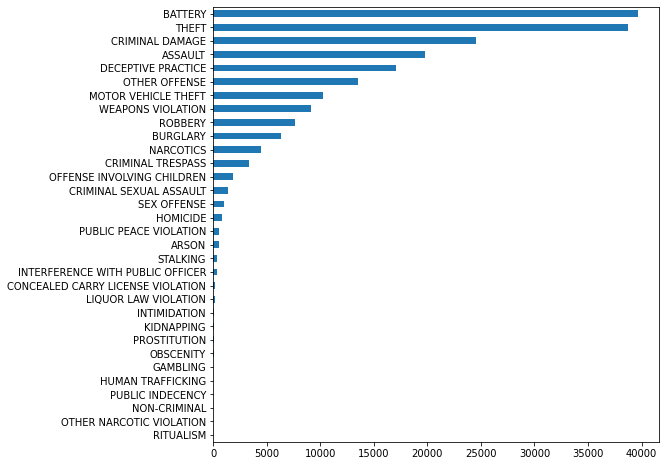

In [ ]:
df["primary_description"].value_counts(ascending=True).plot(kind="barh", figsize=(8,8))
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

## **Conclusion**
The crimes frequency drops from high to low.

There are 32 primary_description crimes and i will be Focusing on the top 20 crimes from primary_description.

## **Which wards have most crimes?**

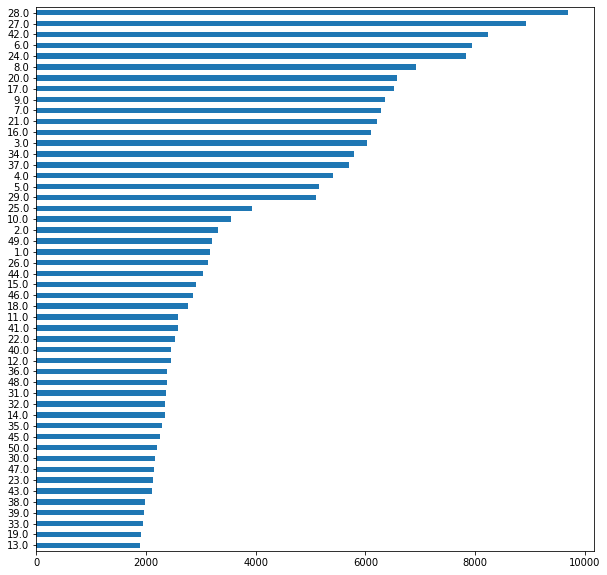

In [ ]:
df["ward"].value_counts(sort= True, ascending=True).head(100).plot(figsize=(10,10), kind="barh")

Wards data is important So I will take all the data from wards.

## **which locations have frequent crimes?**

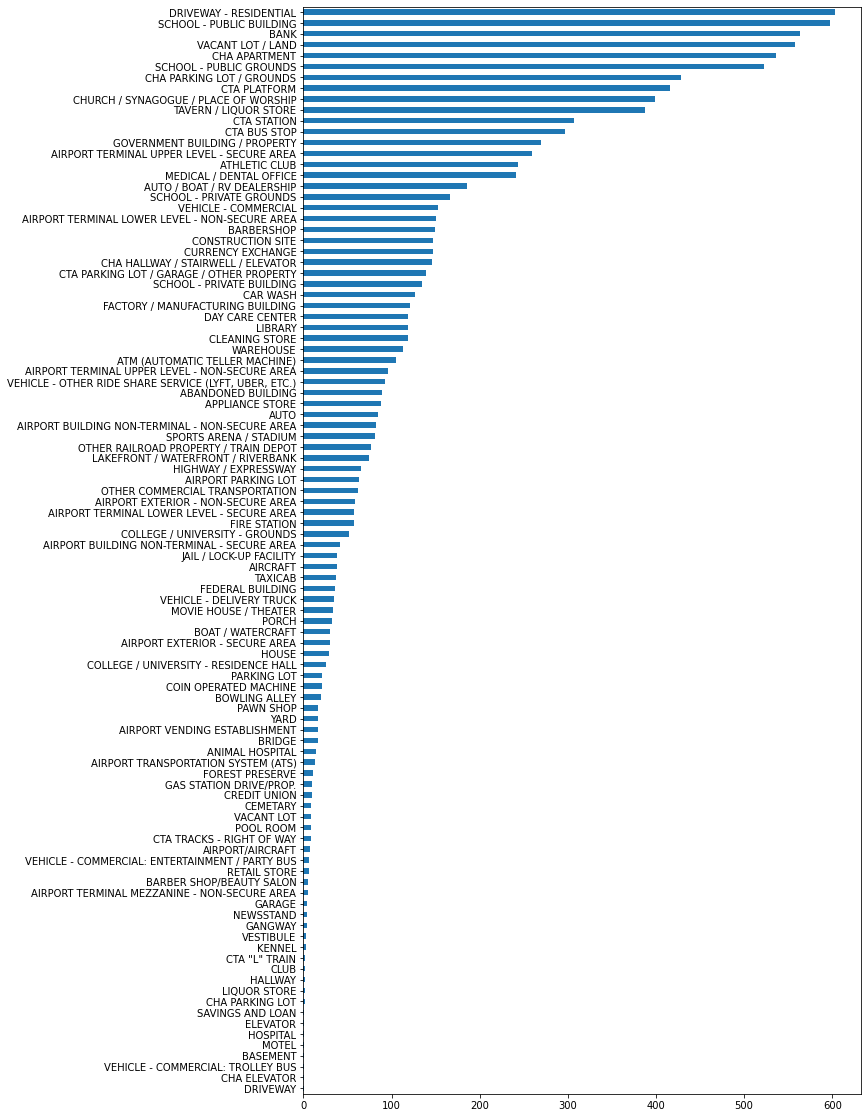

In [ ]:
df["location_description"].value_counts(sort= True, ascending=True).head(100).plot(figsize=(10,20), kind="barh")

# **conclusion**
The frequency drops drastically So I will take top 60 locations from location_description

# **Some Other Data analysis**

## **Which months which crime happens frequently?**

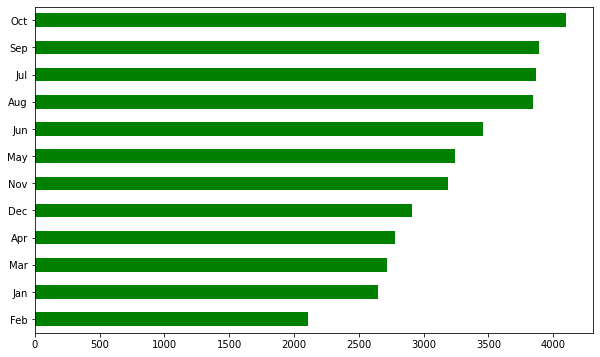

In [ ]:
crime_type="THEFT"
groupPrim_Desc= df.groupby(["primary_description"], sort=True)
groupPrim_Desc.get_group(crime_type)["month"].value_counts(sort= True, ascending=True).plot(figsize=(10,6), color="g", kind="barh")

## **which weekdays the most frequent crime happens?**

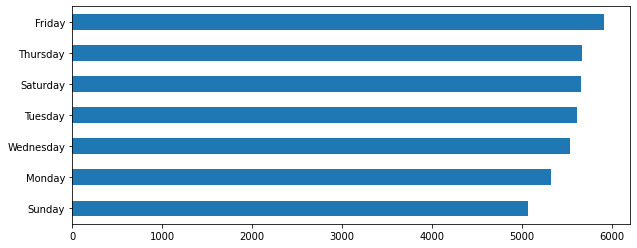

In [ ]:
groupPrim_Desc.get_group(crime_type)["week_day"].value_counts(sort= True, ascending=True).plot(figsize=(10,4), kind="barh")  #.unstack().head(25).plot(figsize=(200,10), kind="bar")

## **which hour the most frequent crime happens?**

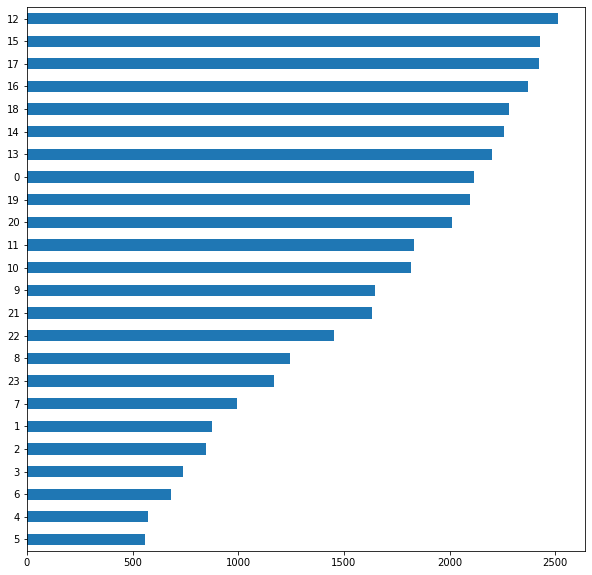

In [ ]:
groupPrim_Desc.get_group(crime_type)["hour"].value_counts(sort= True, ascending=True).plot(figsize=(10,10), kind="barh")  #.unstack().head(25).plot(figsize=(200,10), kind="bar")

# **Saving Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/dataset_analyzed_First_Step.csv")

Mounted at /content/gdrive
